In [33]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt


import tensorflow as tf




In [34]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

In [35]:
trainData = pd.read_csv("TrainingDataMulti.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataMulti.csv", sep=",",header=None)

In [36]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [8]:
df_train.iloc[:,-1].value_counts()

0    3000
2    1500
1    1500
Name: 128, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)

In [10]:


pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SGD_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SGD_accuracy)) 

Test set accuracy: 0.69


In [11]:

pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.64


In [12]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
LG_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(LG_accuracy)) 

Test set accuracy: 0.72


In [13]:
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
pipe
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 

Test set accuracy: 0.90


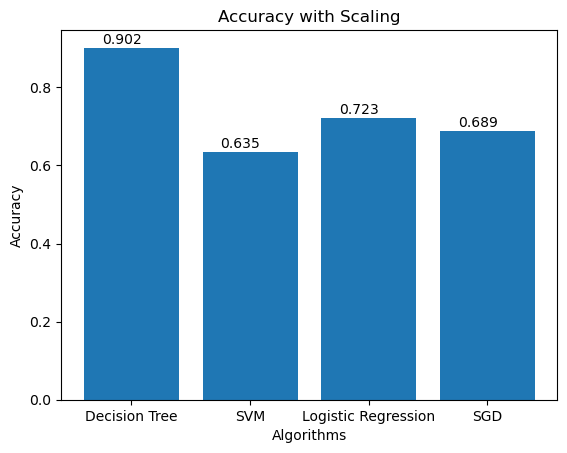

In [14]:
x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_accuracy, SVM_accuracy, LG_accuracy, SGD_accuracy]

plt.bar(x_axis, y_axis)
plt.title('Accuracy with Scaling')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

In [32]:
def kFoldAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy =[]
    BG_accuracy =[]
    ADA_accuracy = []
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='poly'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
        pipe.fit(X_train, y_train)
        ADA_accuracy.append(pipe.score(X_test, y_test)) 
        
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=1000, bootstrap=True, n_jobs=-1
        )
        bag_clf.fit(X_train, y_train)
        BG_accuracy.append(bag_clf.score(X_test, y_test))
    
    print("SGD Test set accuracy", SGD_accuracy) 
    print("SVM Test set accuracy", SVM_accuracy) 
    print("LG Test set accuracy", LG_accuracy) 
    print("DT Test set accuracy", DT_accuracy) 
    print("BG Test set accuracy", BG_accuracy) 
    x_axis = ['Decision Tree','Random Forest','Bagging Classifier','SVM' ,'ADA', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy , BG_accuracy ,SVM_accuracy, ADA_accuracy ,LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Accuracy with Scaling')
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
SGD Test set accuracy [0.6341666666666667, 0.6991666666666667, 0.6833333333333333, 0.6941666666666667, 0.6866666666666666]
SVM Test set accuracy [0.6416666666666667, 0.6391666666666667, 0.6558333333333334, 0.6241666666666666, 0.6616666666666666]
LG Test set accuracy [0.7108333333333333, 0.7433333333333333, 0.7458333333333333, 0.725, 0.7408333333333333]
DT Test set accuracy [0.8991666666666667, 0.8833333333333333, 0.9116666666666666, 0.8858333333333334, 0.8966666666666666]
BG Test set accuracy [0.8866666666666667, 0.8808333333333334, 0.8966666666666666, 0.9066666666666666, 0.9058333333333334]


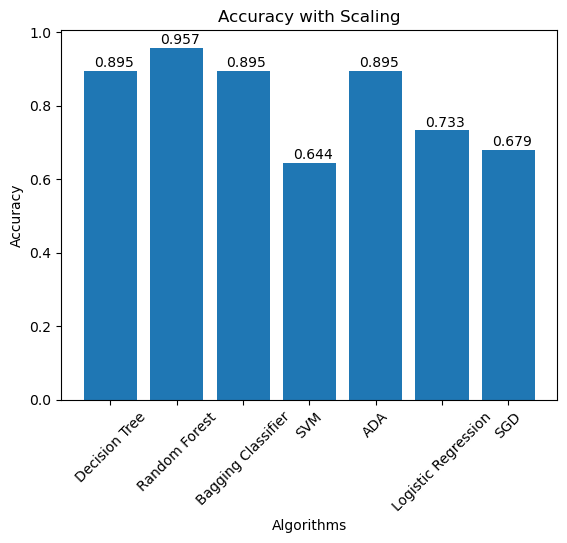

In [33]:
kFoldAverages(5,StandardScaler)

In [17]:
def kFoldBoxAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy = []
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
#         print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='poly'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
                   

    
#     print("SGD Test set accuracy", SGD_accuracy) 
#     print("SVM Test set accuracy", SVM_accuracy) 
#     print("LG Test set accuracy", LG_accuracy) 
#     print("DT Test set accuracy", DT_accuracy) 
    plt.title('Accuracy with Scaling')
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy')
    plt.boxplot([DT_accuracy,RF_accuracy,SVM_accuracy,SGD_accuracy,LG_accuracy],labels= ['Decision Tree','Random Forest', 'SVM', 'Logistic Regression', 'SGD'])
    plt.show()

In [18]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.91


In [19]:
voting_clf = VotingClassifier(
        estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())],
        voting='hard'
    )

pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe.fit(X_train, y_train)
                   

# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.96


In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)


print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.96


In [21]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu', input_shape=(128,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))





Epoch 1/80


2023-05-25 17:36:31.084287: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


169/169 [==============================] - 1s 2ms/step - loss: 0.7570 - accuracy: 0.6598 - val_loss: 0.6025 - val_accuracy: 0.7483
Epoch 2/80
169/169 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7459 - val_loss: 0.5511 - val_accuracy: 0.7800
Epoch 3/80
169/169 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7754 - val_loss: 0.5895 - val_accuracy: 0.7483
Epoch 4/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7956 - val_loss: 0.4988 - val_accuracy: 0.7950
Epoch 5/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8080 - val_loss: 0.4784 - val_accuracy: 0.8150
Epoch 6/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8269 - val_loss: 0.4909 - val_accuracy: 0.8050
Epoch 7/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8356 - val_loss: 0.4837 - val_accuracy: 0.8150
Epoch 8/80
169/16

In [22]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='elu', input_shape=(128,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='elu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))





Epoch 1/300
169/169 [==============================] - 1s 2ms/step - loss: 11.3477 - accuracy: 0.5919 - val_loss: 4.3551 - val_accuracy: 0.6417
Epoch 2/300
169/169 [==============================] - 0s 2ms/step - loss: 2.6045 - accuracy: 0.6519 - val_loss: 1.5403 - val_accuracy: 0.6467
Epoch 3/300
169/169 [==============================] - 0s 2ms/step - loss: 1.3876 - accuracy: 0.6719 - val_loss: 1.3000 - val_accuracy: 0.6667
Epoch 4/300
169/169 [==============================] - 0s 2ms/step - loss: 1.1668 - accuracy: 0.6789 - val_loss: 1.0579 - val_accuracy: 0.6833
Epoch 5/300
169/169 [==============================] - 0s 2ms/step - loss: 1.0809 - accuracy: 0.6844 - val_loss: 1.0973 - val_accuracy: 0.6950
Epoch 6/300
169/169 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.6926 - val_loss: 0.9656 - val_accuracy: 0.7033
Epoch 7/300
169/169 [==============================] - 0s 2ms/step - loss: 0.9655 - accuracy: 0.6976 - val_loss: 0.9015 - val_accuracy: 0.698

Epoch 58/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7787 - val_loss: 0.6579 - val_accuracy: 0.8133
Epoch 59/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7857 - val_loss: 0.6851 - val_accuracy: 0.8183
Epoch 60/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7911 - val_loss: 0.6443 - val_accuracy: 0.8017
Epoch 61/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7917 - val_loss: 0.6819 - val_accuracy: 0.8133
Epoch 62/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7800 - val_loss: 0.6629 - val_accuracy: 0.8150
Epoch 63/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7963 - val_loss: 0.6424 - val_accuracy: 0.8267
Epoch 64/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7887 - val_loss: 0.6179 - val_accuracy:

Epoch 115/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.8267 - val_loss: 0.5618 - val_accuracy: 0.8500
Epoch 116/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8281 - val_loss: 0.5611 - val_accuracy: 0.8533
Epoch 117/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8219 - val_loss: 0.5721 - val_accuracy: 0.8550
Epoch 118/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8257 - val_loss: 0.5683 - val_accuracy: 0.8517
Epoch 119/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.8269 - val_loss: 0.5744 - val_accuracy: 0.8467
Epoch 120/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.8241 - val_loss: 0.5866 - val_accuracy: 0.8333
Epoch 121/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.8215 - val_loss: 0.5620 - val_ac

169/169 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8594 - val_loss: 0.4975 - val_accuracy: 0.8667
Epoch 228/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8611 - val_loss: 0.5227 - val_accuracy: 0.8550
Epoch 229/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8567 - val_loss: 0.5329 - val_accuracy: 0.8683
Epoch 230/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8548 - val_loss: 0.4978 - val_accuracy: 0.8600
Epoch 231/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8554 - val_loss: 0.5124 - val_accuracy: 0.8733
Epoch 232/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8544 - val_loss: 0.5054 - val_accuracy: 0.8667
Epoch 233/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8596 - val_loss: 0.5360 - val_accuracy: 0.8767

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=None)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='elu', input_shape=(128,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


In [ ]:
model.evaluate(X_test, y_test)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=10)
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search
print("Starting Search")
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Starting Search
Best Parameters:  {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
Best Score:  0.9502083333333333


NameError: name 'classification_report' is not defined

In [7]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=10)
param_grid = {
    'n_estimators': [50, 100, 200,300,400],  # Number of weak learners (decision trees)
    'learning_rate': [0.1,0.2,0.3, 0.5, 1.0]  # Learning rate
}

# Create an instance of the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Perform grid search
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 300}
Best Score:  0.8791666666666667


In [14]:
def kFoldForest(num):
    
    RF_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        
        pipe = RandomForestClassifier()
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
    
    
    x_axis = ["Fold "+ str(i+1) for i in range(len(RF_accuracy))]
    y_axis = RF_accuracy
    plt.bar(x_axis, y_axis)
    plt.title('Random Forest Results with K-fold')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


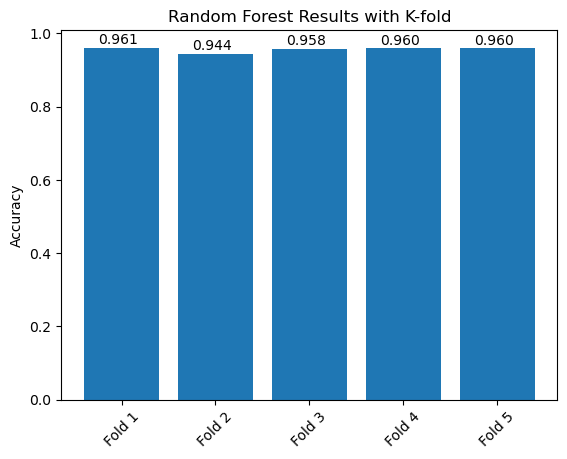

In [15]:
kFoldForest(5)

In [37]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]


In [38]:
X_test=pd.DataFrame(data = testData)

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train,y_train))

1.0


In [40]:
preds = rfc.predict(X_test)

In [41]:
pd.DataFrame(preds).to_csv('TestingResultsMulti.csv', index=False, header=False)

In [29]:
pps = rfc.predict_proba(X_test)

In [30]:
con = []
for y in pps:
    con.append(max(y))
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

[0.95, 0.78, 0.77, 0.75, 0.76, 0.73, 0.61, 0.57, 0.61, 0.61, 0.63, 0.9, 0.84, 0.82, 0.8, 0.79, 0.77, 0.63, 0.58, 0.45, 0.43, 0.43, 0.48, 0.48, 0.48, 0.48, 0.4, 0.74, 0.7, 0.71, 0.56, 0.7, 0.6, 0.92, 0.96, 0.94, 0.94, 0.93, 0.49, 0.56, 0.53, 0.43, 0.48, 0.64, 0.59, 0.75, 0.72, 0.71, 0.77, 0.68, 0.64, 0.68, 0.61, 0.56, 0.6, 0.75, 0.64, 0.53, 0.68, 0.55, 0.87, 0.88, 0.83, 0.8, 0.76, 0.77, 0.98, 0.81, 0.9, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 0.96, 0.93, 0.95, 0.91, 0.9, 0.87, 0.93, 0.78, 0.79, 0.59, 0.61, 0.69, 0.75, 0.75, 0.81, 0.82, 0.6, 0.61, 0.63, 0.75, 0.87, 0.84, 0.82, 0.82, 0.82]
average confindence 0.7319999999999998


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)
pipe = make_pipeline(StandardScaler(),RandomForestClassifier())z
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 
pps =pipe.predict_proba(X_test)

con = []
for y in pps:
    con.append(max(y))
        
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

Test set accuracy: 0.95
[0.99, 0.86, 0.99, 1.0, 0.8, 0.77, 0.89, 0.97, 0.82, 0.55, 0.8, 0.84, 0.88, 0.87, 0.71, 0.95, 0.94, 0.96, 0.99, 1.0, 0.91, 0.54, 0.99, 0.91, 0.46, 0.99, 0.98, 0.96, 0.92, 0.76, 0.96, 1.0, 0.71, 0.93, 0.98, 0.94, 0.98, 0.98, 0.96, 0.94, 0.75, 0.99, 0.77, 0.67, 0.96, 0.98, 1.0, 0.48, 1.0, 0.99, 1.0, 0.96, 0.77, 1.0, 0.88, 0.93, 0.93, 0.98, 0.77, 0.87, 0.94, 1.0, 0.94, 0.46, 0.86, 0.94, 0.68, 0.99, 1.0, 0.93, 0.89, 0.92, 0.57, 1.0, 0.74, 0.74, 0.62, 0.52, 0.99, 0.7, 0.66, 1.0, 0.91, 0.98, 0.99, 0.96, 0.64, 0.74, 0.99, 0.99, 0.95, 1.0, 0.99, 0.97, 1.0, 0.94, 0.95, 1.0, 0.5, 0.78, 1.0, 0.99, 0.99, 1.0, 0.69, 0.94, 0.67, 0.7, 0.99, 0.96, 0.71, 0.96, 0.51, 0.74, 0.6, 0.7, 1.0, 0.8, 1.0, 0.78, 0.69, 0.87, 0.91, 0.99, 0.91, 0.68, 0.97, 0.83, 0.98, 1.0, 1.0, 1.0, 0.94, 0.86, 0.73, 0.97, 0.99, 0.55, 1.0, 0.99, 0.99, 0.8, 0.98, 0.96, 0.94, 0.75, 1.0, 0.97, 0.71, 0.66, 0.94, 1.0, 0.96, 0.67, 0.98, 0.98, 0.96, 0.75, 1.0, 0.98, 0.96, 1.0, 0.95, 0.99, 1.0, 0.89, 1.0, 0.98, 0.91

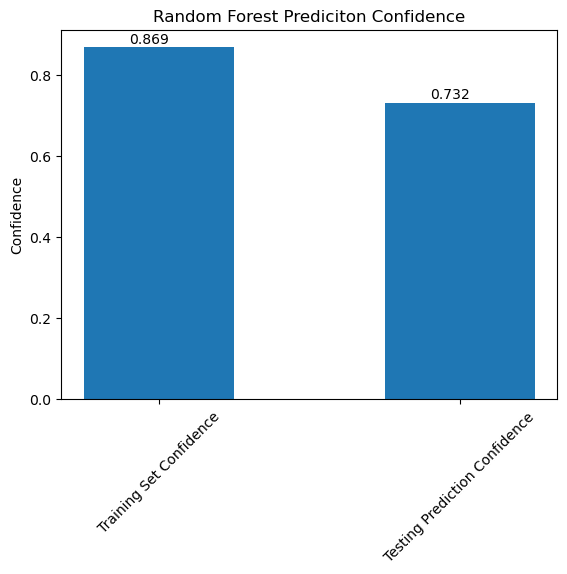

In [32]:
x_axis = ["Training Set Confidence", "Testing Prediction Confidence"]
y_axis = [0.869,0.732]
plt.bar(x_axis, y_axis, width = 0.5)
plt.title('Random Forest Prediciton Confidence')
plt.ylabel('Confidence')
for i, v in enumerate(y_axis):
    plt.text(i-0.1, v+0.01, "{:.3}".format(v))
plt.xticks(rotation=45)
plt.show()